In [1]:
# auto-load when code changes outside
%load_ext autoreload
%autoreload 2
%load_ext pyinstrument

import sys
sys.path.insert(0,'..')


In [2]:
#imports 
import os
import numpy as np
import pandas as pd

from src.utils import plot_image, plot_im, save_im


In [4]:
# data_location='/home/salnabulsi/coat-of-arms/data/cropped_coas/out_valid'
# data_location='/home/salnabulsi/coat-of-arms/data/cropped_coas/out'
# data_location='/Users/salnabulsi/tub/coat-of-arms/data/cropped_coas/out_valid'

data_location='/Users/salnabulsi/tub/coat-of-arms/data/cropped_coas/out'
test_caption_file  = data_location + '/test_real_captions_psumsq.txt'
root_folder_images = data_location + '/images'

df = pd.read_csv(test_caption_file)

print("There are {} test images".format(len(df)))

df

There are 0 test images


,image,caption,psum,psum_sq


## Get the sizes of the images

In [4]:
from PIL import Image
ls = []
ims_size = []
for im in df['image']:
    image_full_path = root_folder_images + '/' + im
    img = Image.open(image_full_path).convert("RGB")
    ls.append(img.size)
    ims_size.append({'img': im, 'size': img.size })


## Get the image label with it's matching size 

In [5]:
for item in ims_size:
    print(item)

{'img': '1739_A G cross patonce.jpg', 'size': (623, 528)}
{'img': '22117_O B cross patriarchal.jpg', 'size': (566, 595)}
{'img': '2870_O S lion rampant.jpg', 'size': (487, 490)}
{'img': '6870_S O eagle.jpg', 'size': (655, 598)}
{'img': '18746_S A eagle.jpg', 'size': (695, 805)}
{'img': '29836_G O 3 eagles.jpg', 'size': (623, 804)}
{'img': '4660_G O eagle.jpg', 'size': (124, 114)}
{'img': '17931_O B lion rampant.jpg', 'size': (570, 574)}
{'img': '1543_G O lion passt guard.jpg', 'size': (629, 595)}
{'img': '16797_A G 2 lions rampant addorsed.jpg', 'size': (477, 543)}
{'img': '19342_G A eagle.jpg', 'size': (502, 488)}
{'img': '1154_A G lion rampant.jpg', 'size': (622, 625)}
{'img': '9575_O B 3 lions passt cr..jpg', 'size': (538, 487)}
{'img': '2540_B A lion rampant.jpg', 'size': (615, 610)}
{'img': '1426_G O 3 lions.jpg', 'size': (596, 614)}
{'img': '22319_O G lion q.f..jpg', 'size': (650, 583)}
{'img': '27623_G A 3 lions.jpg', 'size': (646, 661)}
{'img': '22874_O G cross.jpg', 'size': (5

## Get the min/max size of the images

In [6]:
import operator

unique_sizes = list(set(ls))
print(f' Total number of unique_sizes: {len(unique_sizes)}')

min_size = min(unique_sizes, key=operator.itemgetter(1))
max_size = max(unique_sizes, key=operator.itemgetter(1))
print(f' min size: {min_size}\n max size: {max_size}')


 Total number of unique_sizes: 265
 min size: (111, 109)
 max size: (2095, 2105)


#### min size image: {'img': '7350_A V lion rampant.jpg', 'size': (111, 109)}
#### max size image: {'img': '3324_O G lion rampant.jpg', 'size': (2095, 2105)}


# Get the average size of the images

In [24]:

avg_size = get_avg_size(unique_sizes)    
avg_size


(600, 620)

## Resize the image and plot it before & after

In [29]:
def resize(img, avg_size):
    img = img.resize(avg_size)
    return img


(574, 574)


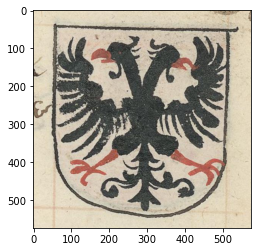

(600, 620)


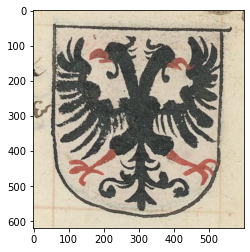

In [30]:

# random image 
image_name = '1537_A S eagle doubleheaded.jpg'
image_full_path = root_folder_images + '/' + image_name


org_img = Image.open(image_full_path).convert("RGB")
print(org_img.size)
plot_image(image_full_path)

res_im = resize(org_img, avg_size)
print(res_im.size)
plot_im(res_im)


(111, 109)


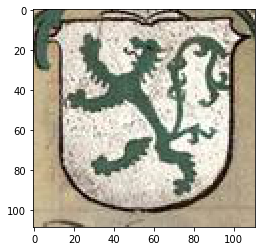

(600, 620)


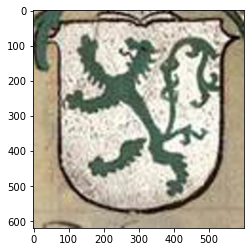

In [35]:


# min image 
image_name = '7350_A V lion rampant.jpg'
image_full_path = root_folder_images + '/' + image_name
org_img = Image.open(image_full_path).convert("RGB")
print(org_img.size)
plot_image(image_full_path)

res_im = resize(org_img, avg_size)
print(res_im.size)
# plot_im(res_im)


image_re_full_path = root_folder_images + '/resized/'+ image_name
save_im(res_im,image_re_full_path,'JPEG')
plot_image(image_re_full_path)


(2095, 2105)


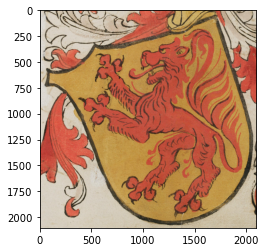

(600, 620)


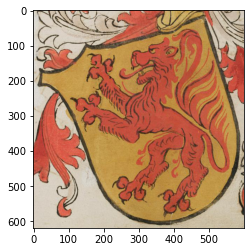

In [37]:


# max image 
image_name = '3324_O G lion rampant.jpg'
image_full_path = root_folder_images + '/' + image_name
org_img = Image.open(image_full_path).convert("RGB")
print(org_img.size)
plot_image(image_full_path)

res_im = resize(org_img, avg_size)
print(res_im.size)
# plot_im(res_im)


image_re_full_path = root_folder_images + '/resized/'+ image_name
save_im(res_im,image_re_full_path,'JPEG')
plot_image(image_re_full_path)


# Resize the cropped images

In [39]:
for image_name in df['image']:
    image_full_path = root_folder_images + '/' + image_name
    image_re_full_path = root_folder_images + '/resized/'+ image_name

    img = Image.open(image_full_path).convert("RGB")
    res_im = resize(img, avg_size)

    save_im(res_im,image_re_full_path,'JPEG')
    print(f'Image {image_name} has been resized successfully!')


Image 1739_A G cross patonce.jpg has been resized successfully!
Image 22117_O B cross patriarchal.jpg has been resized successfully!
Image 2870_O S lion rampant.jpg has been resized successfully!
Image 6870_S O eagle.jpg has been resized successfully!
Image 18746_S A eagle.jpg has been resized successfully!
Image 29836_G O 3 eagles.jpg has been resized successfully!
Image 4660_G O eagle.jpg has been resized successfully!
Image 17931_O B lion rampant.jpg has been resized successfully!
Image 1543_G O lion passt guard.jpg has been resized successfully!
Image 16797_A G 2 lions rampant addorsed.jpg has been resized successfully!
Image 19342_G A eagle.jpg has been resized successfully!
Image 1154_A G lion rampant.jpg has been resized successfully!
Image 9575_O B 3 lions passt cr..jpg has been resized successfully!
Image 2540_B A lion rampant.jpg has been resized successfully!
Image 1426_G O 3 lions.jpg has been resized successfully!
Image 22319_O G lion q.f..jpg has been resized successfully

Image 22919_B G eagle.jpg has been resized successfully!
Image 17567_S A 3 eagles.jpg has been resized successfully!
Image 22705_B O cross.jpg has been resized successfully!
Image 22323_O S cross moline.jpg has been resized successfully!
Image 6352_A V 2 lions passt cr..jpg has been resized successfully!
Image 4488_A B lion rampant.jpg has been resized successfully!
Image 20149_O S lion rampant.jpg has been resized successfully!
Image 3423_G O 2 lions passt guard.jpg has been resized successfully!
Image -1_G O lion rampant.jpg has been resized successfully!
Image 16446_A G 2 lions passt guard cr..jpg has been resized successfully!
Image 19188_O G cross.jpg has been resized successfully!
Image 23024_B O eagle.jpg has been resized successfully!
Image 7350_A V lion rampant.jpg has been resized successfully!
Image 15902_O S eagle.jpg has been resized successfully!
Image 7037_A G cross.jpg has been resized successfully!
Image 6358_A V lion rampant.jpg has been resized successfully!
Image 37